<a href="https://colab.research.google.com/github/stiwari-ds/data-science-competitions/blob/main/analytics_vidhya/jobathon_aug22/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

from sklearn.feature_selection import f_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

SEED = 23
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

In [2]:
data_url = 'https://raw.githubusercontent.com/stiwari-ds/data-science-competitions/main/analytics_vidhya/jobathon_aug22/data/'

train = pd.read_csv(data_url + 'raw/train.csv')
test = pd.read_csv(data_url + 'raw/test.csv')

# Data overview

In [3]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [5]:
#missing values
train.isna().any().any(), test.isna().any().any()

(False, False)

In [6]:
train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


# Target column: click_rate

In [7]:
TARGET = 'click_rate'

In [8]:
train[TARGET].min(), train[TARGET].max()

(0.0, 0.8979591836734694)

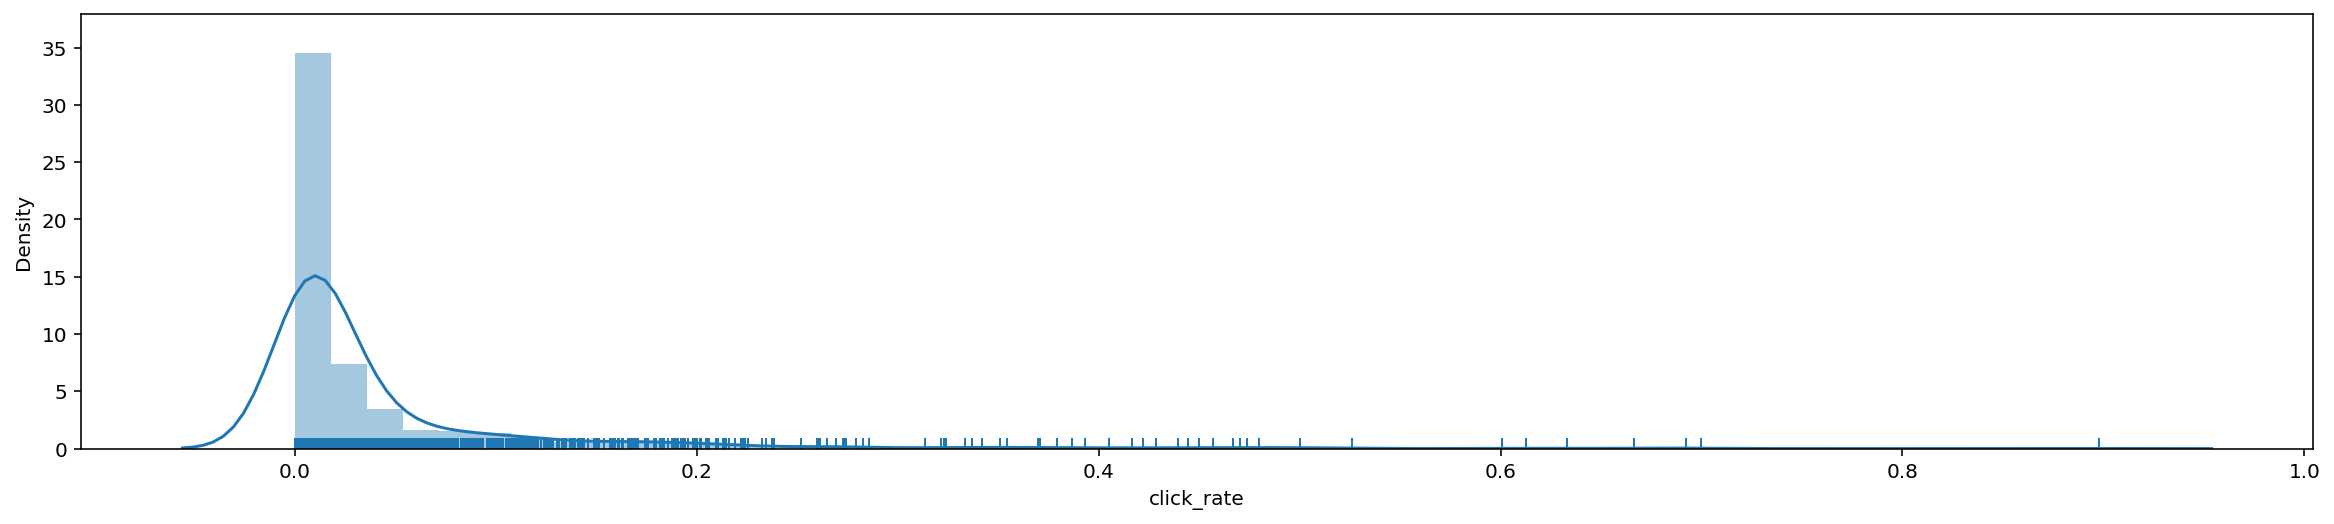

In [9]:
plt.figure(figsize=(20, 4))
sns.distplot(a=train[TARGET], rug=True)
plt.show()

# Feature columns

### campaign_id - unique identifier

In [10]:
train.shape[0], test.shape[0]

(1888, 762)

In [11]:
train.campaign_id.nunique(), test.campaign_id.nunique()

(1888, 762)

In [12]:
set(train.campaign_id.unique()).intersection(set(test.campaign_id.unique()))

set()

### sender

In [13]:
train.sender.nunique(), test.sender.nunique()

(12, 12)

In [14]:
sorted(train.sender.unique()), sorted(test.sender.unique())

([0, 1, 2, 3, 6, 7, 9, 10, 11, 12, 14, 15],
 [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15])

New senders {4, 5, 8, 13} in test set. Need to rework this column if we have to use it as a feature.

In [15]:
test.sender.value_counts()

3     642
10     62
15     35
6      10
9       4
11      3
13      1
7       1
1       1
5       1
4       1
8       1
Name: sender, dtype: int64

New senders only have one record each. We can create an 'others' category by grouping all the low-count senders.

In [16]:
train.groupby('sender')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
sender,,,,,
0,3,0.007479,0.012607,0.009385,0.008068
1,1,0.002660,0.002660,0.002660,0.002660
2,1,0.070796,0.070796,0.070796,0.070796
3,1559,0.000000,0.700000,0.042660,0.010457
6,22,0.001657,0.036000,0.011454,0.009669
7,2,0.612466,0.897959,0.755213,0.755213
9,13,0.004819,0.040923,0.012500,0.010511
10,181,0.000000,0.500000,0.043450,0.011674
11,7,0.006959,0.042056,0.022946,0.020846


In [17]:
sender_mapping = {
    3: 0,
    10: 1,
    15: 2,
    6: 3,
    9: 4,
    11: 5,
    #others
    0: 6, 1: 6, 2: 6, 4: 6, 5: 6, 7: 6, 8: 6, 12: 6, 13: 6, 14: 6, 
}

train.sender.replace(sender_mapping, inplace=True)
test.sender.replace(sender_mapping, inplace=True)

### subject_len

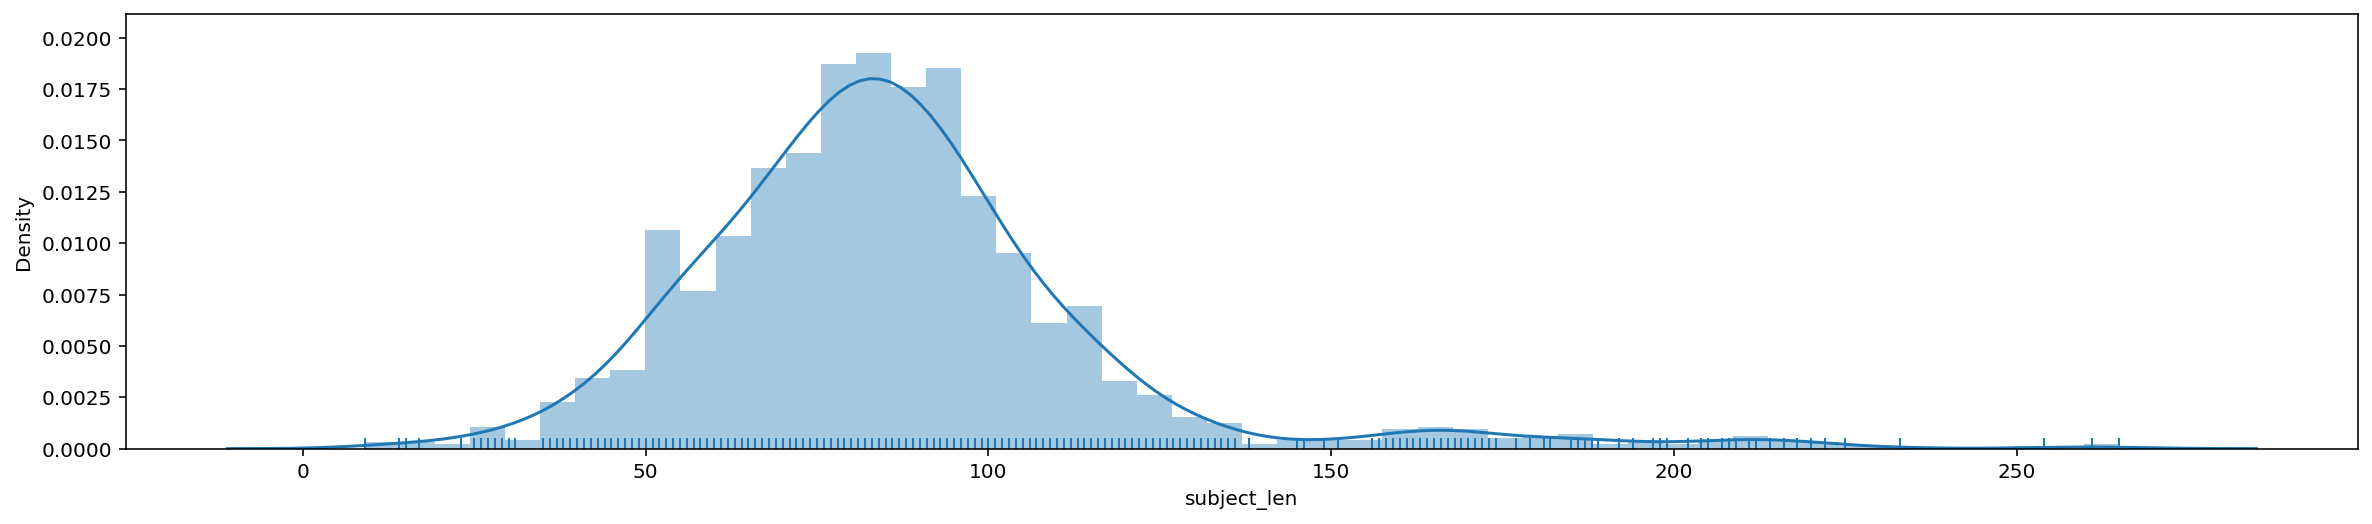

In [18]:
plt.figure(figsize=(20, 4))
sns.distplot(a=train.subject_len, rug=True)
plt.show()

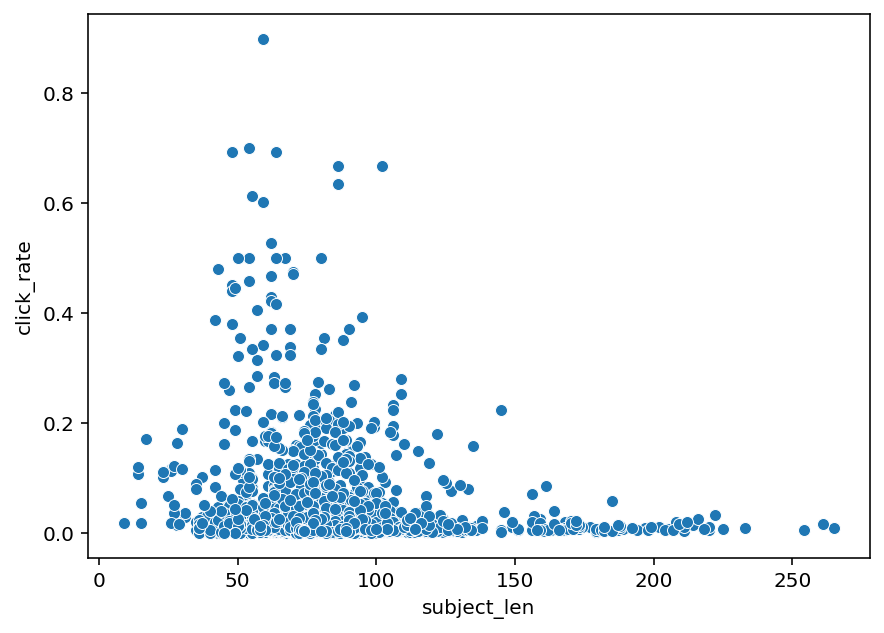

In [19]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='subject_len', y=TARGET, data=train)
plt.show()

Hints of inverse correlation are visible.

### body_len

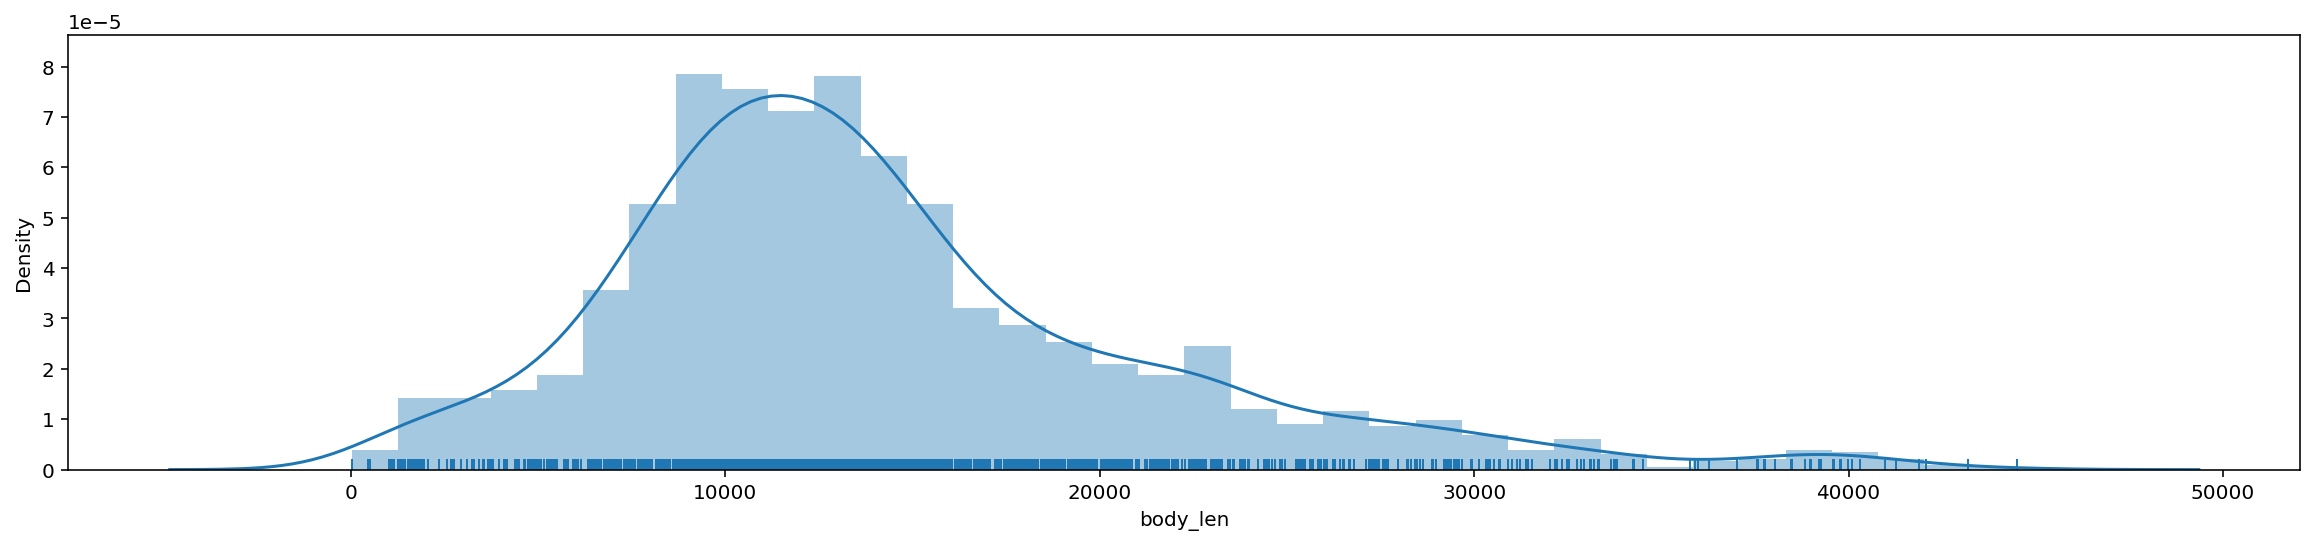

In [20]:
plt.figure(figsize=(20, 4))
sns.distplot(a=train.body_len, rug=True)
plt.show()

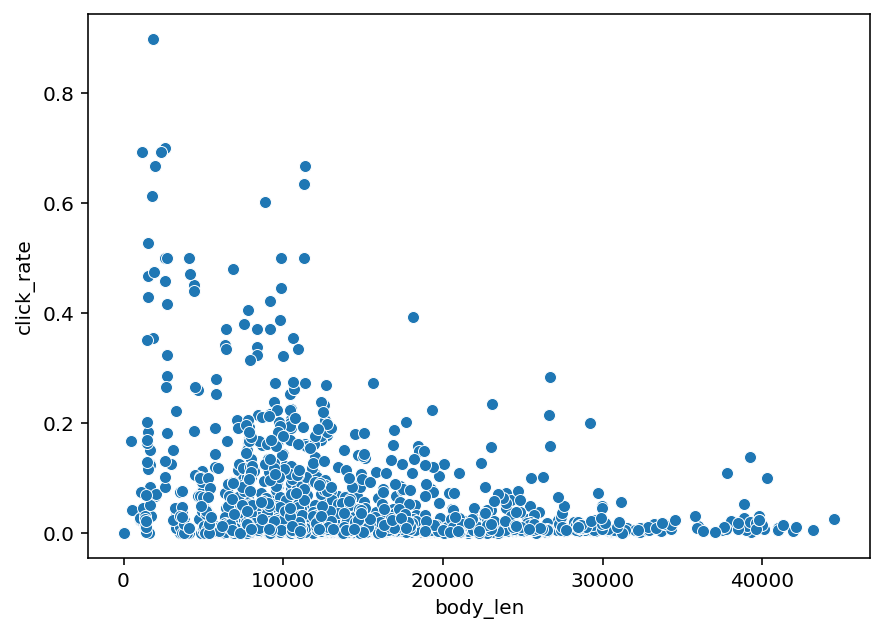

In [21]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='body_len', y=TARGET, data=train)
plt.show()

Similar indications as *subject_len*.

### mean_paragraph_len

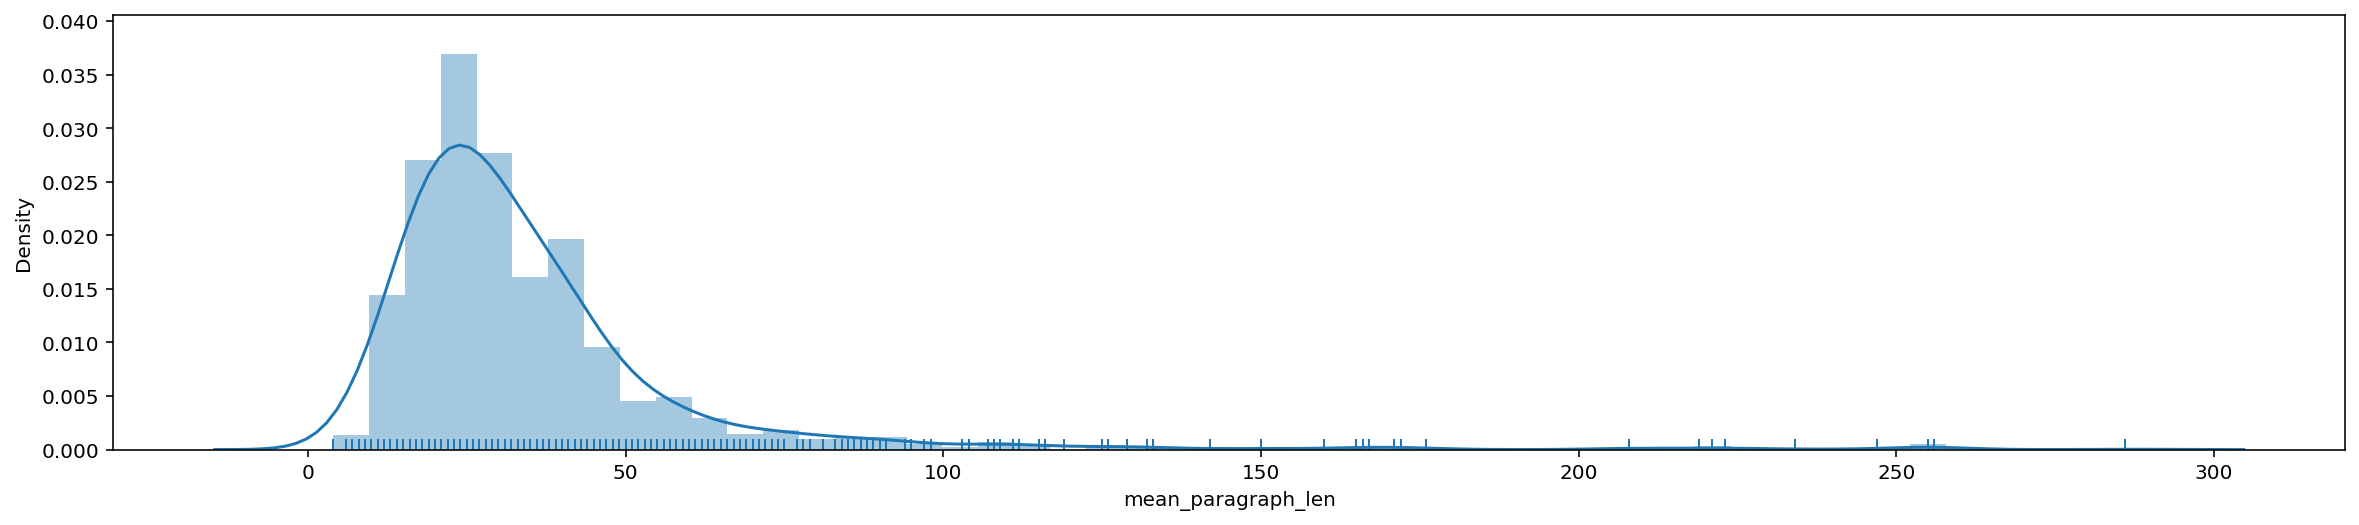

In [22]:
plt.figure(figsize=(20, 4))
sns.distplot(a=train.mean_paragraph_len, rug=True)
plt.show()

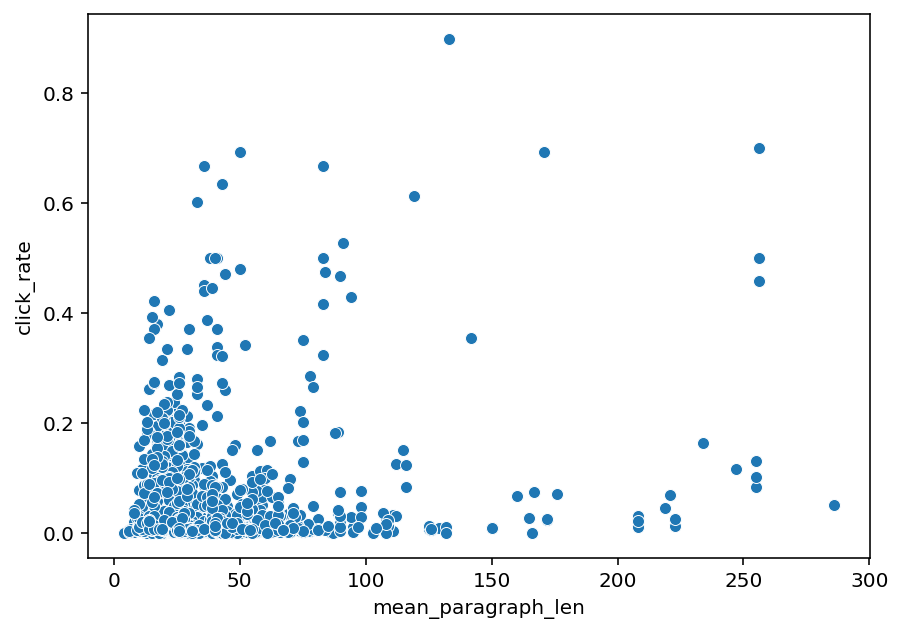

In [23]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='mean_paragraph_len', y=TARGET, data=train)
plt.show()

No clear indicators of correlation visually. Will require statistical tests to confirm. 

### day_of_week

In [24]:
train.groupby('day_of_week')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
day_of_week,,,,,
0,208,0.0,0.500000,0.034590,0.009232
1,295,0.0,0.692521,0.036857,0.010261
2,333,0.0,0.897959,0.033967,0.009456
3,346,0.0,0.526316,0.041123,0.009897
4,329,0.0,0.500000,0.037786,0.010077
5,237,0.0,0.700000,0.068755,0.020665
6,140,0.0,0.428571,0.048217,0.018104


Significant increase in click_rate on day 5 and 6 (most probably the weekend).

In [25]:
sorted(test.day_of_week.unique())

[0, 1, 2, 3, 4, 5, 6]

### is_weekend

In [26]:
train.groupby('day_of_week')['is_weekend'].value_counts()

day_of_week  is_weekend
0            0             208
1            0             295
2            0             333
3            0             346
4            0             329
5            1             237
6            1             140
Name: is_weekend, dtype: int64

Days 5 and 6 are indeed the weekend, which makes this a redundant feature if we properly use *day_of_week*.  
Or we could directly use this feature and discard *day_of_week*.

In [27]:
train.groupby('is_weekend')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
is_weekend,,,,,
0,1511,0.0,0.897959,0.037087,0.009847
1,377,0.0,0.700000,0.061128,0.019711


### times_of_day

In [28]:
train.times_of_day.nunique(), test.times_of_day.nunique()

(3, 3)

In [29]:
test.times_of_day.value_counts()

Evening    532
Noon       175
Morning     55
Name: times_of_day, dtype: int64

In [30]:
train.groupby('times_of_day')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
times_of_day,,,,,
Evening,1317,0.0,0.692308,0.033664,0.009149
Morning,124,0.0,0.700000,0.079795,0.035812
Noon,447,0.0,0.897959,0.055602,0.015544


Morning emails have sinificantly higher CTR.  
Evening emails have lowest CTR but they still make up two-thirds of the total count (sign of a wrong strategy).

In [31]:
time_mapping = {
    'Morning': 0,
    'Noon': 1,
    'Evening': 2
}

train.times_of_day.replace(time_mapping, inplace=True)
test.times_of_day.replace(time_mapping, inplace=True)

### category

In [32]:
train.category.nunique(), test.category.nunique()

(16, 16)

In [33]:
test.category.value_counts()

15    309
6     113
2      78
1      77
9      68
10     48
11     26
12     16
5      13
13      7
0       2
3       1
4       1
7       1
8       1
14      1
Name: category, dtype: int64

In [34]:
train.groupby('category')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
category,,,,,
0,1,0.006441,0.006441,0.006441,0.006441
1,200,0.001152,0.692308,0.039403,0.009235
2,166,0.000000,0.700000,0.079360,0.015736
3,6,0.000915,0.008540,0.003699,0.003202
4,6,0.005089,0.024053,0.011947,0.009445
5,19,0.002605,0.048991,0.024078,0.022534
6,229,0.000000,0.600683,0.067375,0.030342
7,4,0.001846,0.897959,0.394864,0.339825
8,6,0.009179,0.026149,0.014272,0.012697


In [35]:
#grouping rare categories
category_mapping = dict(zip([0, 3, 4, 5, 7, 8, 11, 12, 13, 14], [0]*10))

train['re_category'] = train.category.replace(category_mapping)
test['re_category'] = test.category.replace(category_mapping)

### product

In [36]:
train['product'].nunique(), test['product'].nunique()

(43, 39)

High-cardinality categorical column.

In [37]:
sorted(train['product'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43]

In [38]:
sorted(test['product'].unique())

[0,
 1,
 3,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44]

In [39]:
train.groupby('product')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
product,,,,,
0,1,0.006441,0.006441,0.006441,0.006441
1,108,0.000000,0.121212,0.019037,0.010174
2,1,0.005209,0.005209,0.005209,0.005209
3,8,0.002454,0.666667,0.093073,0.012611
4,1,0.004088,0.004088,0.004088,0.004088
5,200,0.001152,0.692308,0.039403,0.009235
6,79,0.001345,0.073883,0.013175,0.008393
7,1,0.013309,0.013309,0.013309,0.013309
8,4,0.007127,0.053755,0.019628,0.008815


### no_of_CTA

In [40]:
train.no_of_CTA.nunique(), test.no_of_CTA.nunique()

(40, 25)

In [41]:
train.no_of_CTA.min(), test.no_of_CTA.min()

(0, 0)

In [42]:
train.no_of_CTA.max(), test.no_of_CTA.max()

(49, 42)

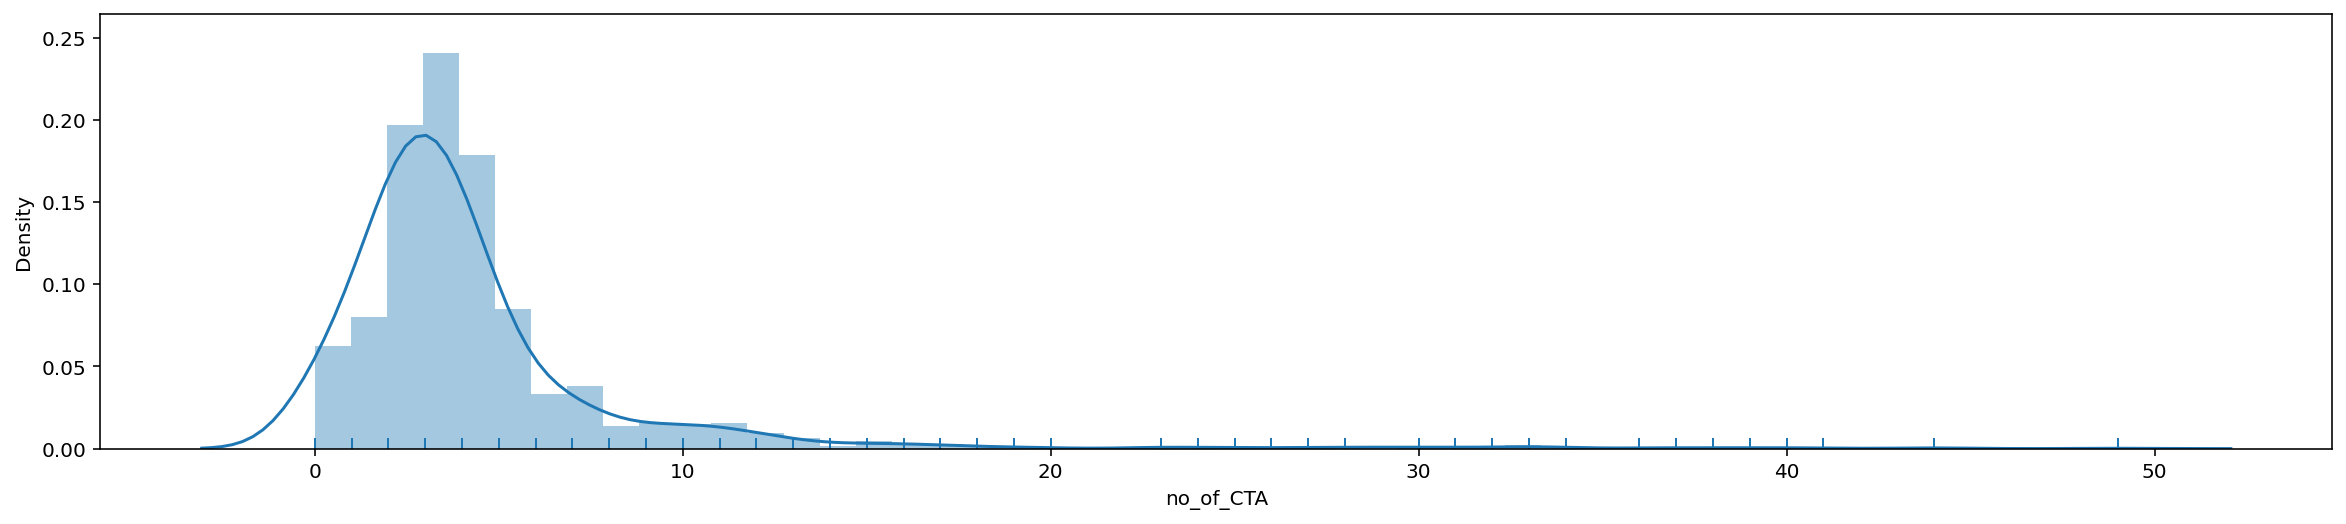

In [43]:
plt.figure(figsize=(20, 4))
sns.distplot(a=train.no_of_CTA, rug=True)
plt.show()

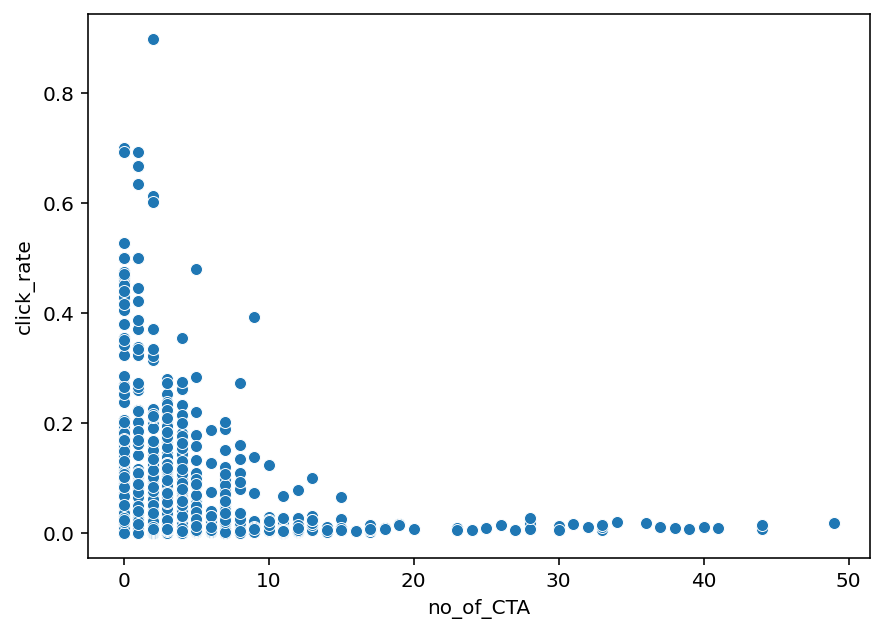

In [44]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='no_of_CTA', y=TARGET, data=train)
plt.show()

Again, we can see a bit of inverse correlation with the target column.

### mean_CTA_len

In [45]:
train.mean_CTA_len.min(), test.mean_CTA_len.min()

(0, 0)

In [46]:
train.mean_CTA_len.max(), test.mean_CTA_len.max()

(162, 96)

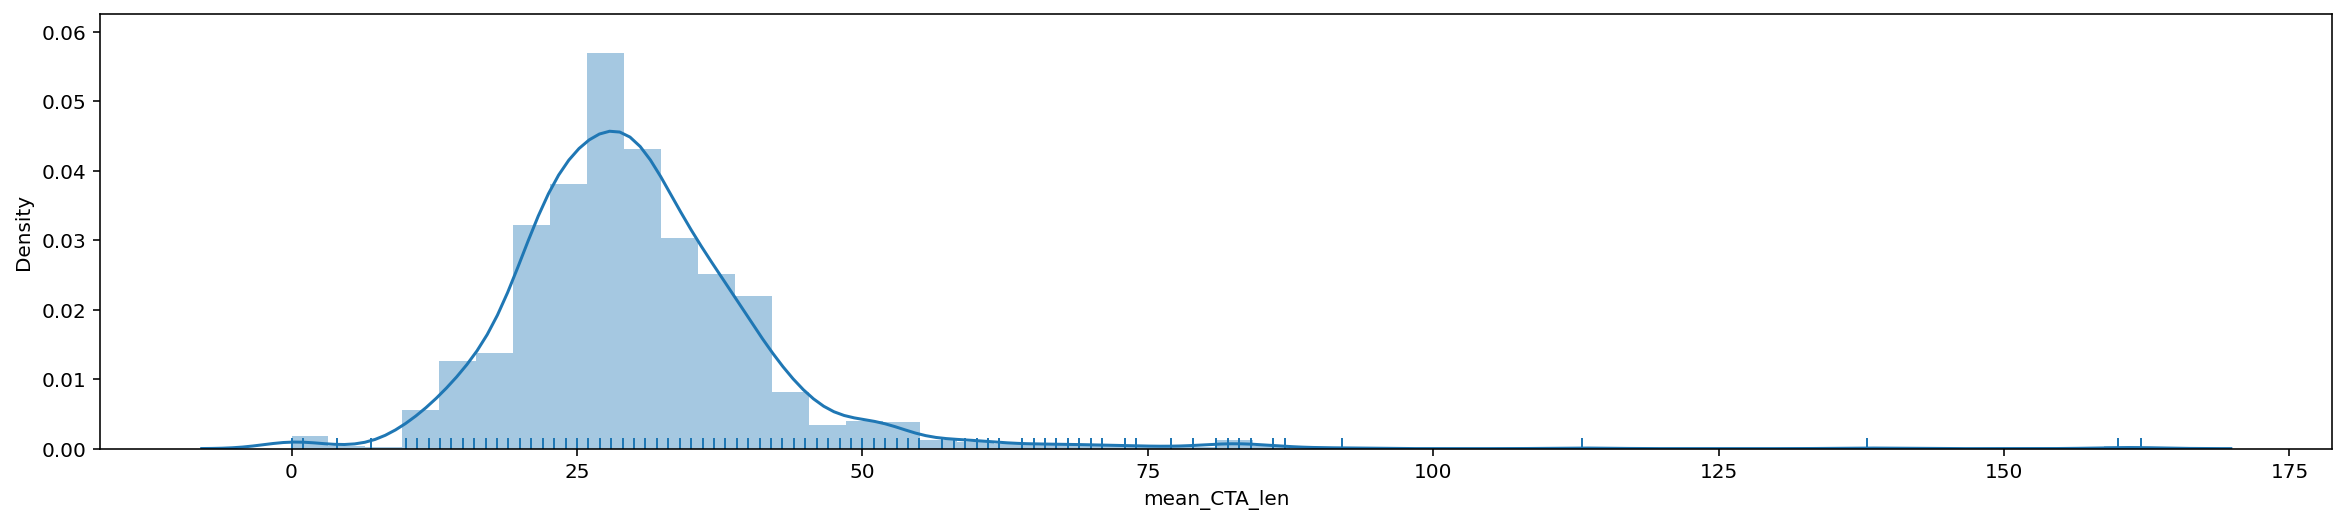

In [47]:
plt.figure(figsize=(20, 4))
sns.distplot(a=train.mean_CTA_len, rug=True)
plt.show()

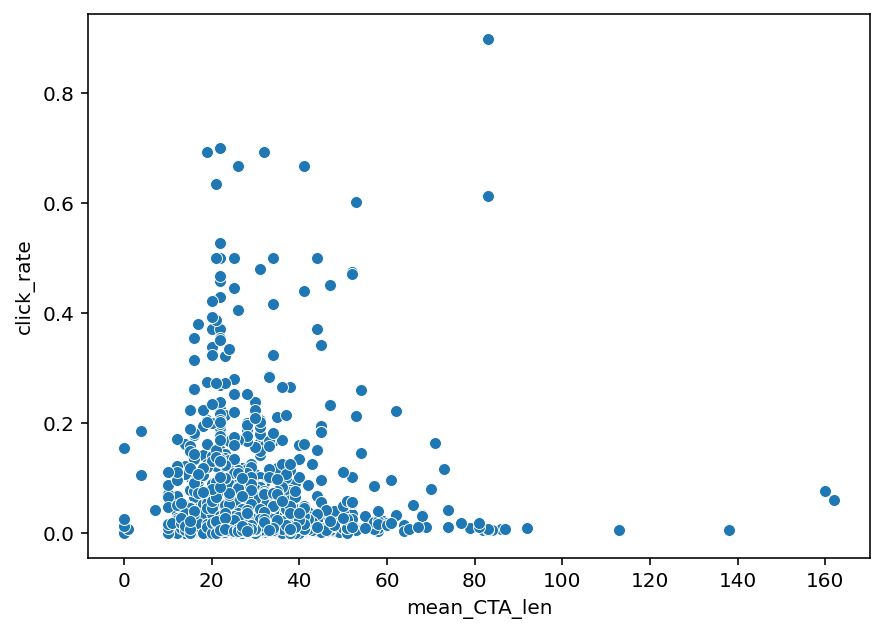

In [48]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='mean_CTA_len', y=TARGET, data=train)
plt.show()

### is_image

In [49]:
train.is_image.nunique(), test.is_image.nunique()

(6, 5)

This is the number of images instead of a boolean indicating presence of image. The column name is misleading.

In [50]:
train.is_image.value_counts()

0    716
1    685
2    442
3     39
6      4
4      2
Name: is_image, dtype: int64

In [51]:
test.is_image.value_counts()

1    279
0    277
2    185
3     19
6      2
Name: is_image, dtype: int64

In [52]:
train.groupby('is_image')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
is_image,,,,,
0,716,0.000000,0.700000,0.044411,0.011744
1,685,0.000000,0.897959,0.041492,0.009866
2,442,0.000000,0.692521,0.037510,0.012017
3,39,0.000000,0.600683,0.053530,0.016700
4,2,0.005001,0.006697,0.005849,0.005849
6,4,0.001627,0.153846,0.046139,0.014542


### is_personalised

In [53]:
train.is_personalised.nunique(), test.is_personalised.nunique()

(2, 2)

In [54]:
train.is_personalised.value_counts(normalize=True)

0    0.943326
1    0.056674
Name: is_personalised, dtype: float64

In [55]:
test.is_personalised.value_counts(normalize=True)

0    0.956693
1    0.043307
Name: is_personalised, dtype: float64

Actually a boolean variable.

In [56]:
train.groupby('is_personalised')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
is_personalised,,,,,
0,1781,0.0,0.897959,0.041208,0.010288
1,107,0.0,0.692308,0.053197,0.023810


On average, more click rate for personalised emails.

### is_quote

In [57]:
train.is_quote.nunique(), test.is_quote.nunique()

(7, 6)

Again, a misleading column name. It is the number of quotes instead of a boolean.

In [58]:
test.is_quote.value_counts()

0    346
1    261
2     89
3     49
4     12
5      5
Name: is_quote, dtype: int64

In [59]:
train.groupby('is_quote')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
is_quote,,,,,
0,885,0.000000,0.897959,0.052058,0.011379
1,638,0.000000,0.692521,0.034740,0.009883
2,227,0.000000,0.237288,0.027959,0.011396
3,93,0.000000,0.422222,0.038471,0.010439
4,27,0.001999,0.178571,0.020871,0.011015
5,12,0.002427,0.053412,0.016996,0.013281
6,6,0.003239,0.083333,0.026094,0.020324


### is_timer

In [60]:
train.is_timer.value_counts(normalize=True)

0    1.0
Name: is_timer, dtype: float64

In [61]:
test.is_timer.value_counts(normalize=True)

0    1.0
Name: is_timer, dtype: float64

All values are the same. We can drop this column since it can provide no information about the target.

In [62]:
train.drop(labels='is_timer', axis=1, inplace=True)
test.drop(labels='is_timer', axis=1, inplace=True)

### is_emoticons

In [63]:
train.is_emoticons.unique()

array([0, 2, 1, 3, 4, 6])

Again, not a boolean variable.

In [64]:
test.is_emoticons.value_counts()

0     644
1      72
2      21
3      15
4       6
6       3
17      1
Name: is_emoticons, dtype: int64

In [65]:
train.groupby('is_emoticons')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
is_emoticons,,,,,
0,1626,0.000000,0.897959,0.045905,0.011984
1,172,0.000000,0.086957,0.011607,0.007063
2,54,0.000000,0.165689,0.037820,0.009543
3,30,0.000000,0.037916,0.009313,0.006410
4,4,0.011680,0.037037,0.022907,0.021455
6,2,0.006843,0.025073,0.015958,0.015958


### is_discount

In [66]:
train.is_discount.unique(), test.is_discount.unique()

(array([0, 1]), array([0, 1]))

In [67]:
train.is_discount.value_counts(normalize=True)

0    0.960275
1    0.039725
Name: is_discount, dtype: float64

In [68]:
test.is_discount.value_counts(normalize=True)

0    0.968504
1    0.031496
Name: is_discount, dtype: float64

In [69]:
train.groupby('is_discount')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
is_discount,,,,,
0,1813,0.0,0.897959,0.043362,0.011396
1,75,0.0,0.036036,0.006242,0.005641


Contrary to expectations, emails with discounts mentioned have lower CTR on average.  
But the distribution is also heavily imbalanced so the difference is less important.

### is_price

In [70]:
train.is_price.nunique(), test.is_price.nunique()

(8, 4)

It is named and described as a boolean flag but the column values do not match with the description.

In [71]:
train.is_price.value_counts()

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64

In [72]:
test.is_price.value_counts()

0       758
5000      2
4999      1
999       1
Name: is_price, dtype: int64

This column also has nearly zero variance, due to which it can provide no information about the target column.  
We will drop it from our features.

In [73]:
train.drop(labels='is_price', axis=1, inplace=True)
test.drop(labels='is_price', axis=1, inplace=True)

### is_urgency

In [74]:
train.is_urgency.nunique(), test.is_urgency.nunique()

(2, 2)

In [75]:
train.is_urgency.value_counts(normalize=True)

0    0.887712
1    0.112288
Name: is_urgency, dtype: float64

In [76]:
test.is_urgency.value_counts(normalize=True)

0    0.885827
1    0.114173
Name: is_urgency, dtype: float64

In [77]:
train.groupby('is_urgency')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
is_urgency,,,,,
0,1676,0.0,0.897959,0.045310,0.011984
1,212,0.0,0.213434,0.014831,0.006943


Again, contrary to expectations, CTR is lower for emails which demand urgent action.  
This might be because they are perceived as spam/phishing emails.

### target_audience

In [78]:
train.target_audience.nunique(), test.target_audience.nunique()

(17, 16)

In [79]:
sorted(train.target_audience.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [80]:
sorted(test.target_audience.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16]

In [81]:
train.groupby('target_audience')[TARGET].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
target_audience,,,,,
0,3,0.001261,0.019732,0.009245,0.006742
1,50,0.001556,0.234694,0.024340,0.011946
2,20,0.001207,0.162791,0.029384,0.015637
3,9,0.008839,0.127820,0.044939,0.030083
4,10,0.001213,0.058355,0.015234,0.010035
5,16,0.000000,0.117798,0.013815,0.004288
6,14,0.000000,0.342105,0.050748,0.010116
7,56,0.000000,0.200000,0.022007,0.007382
8,9,0.001439,0.023410,0.006852,0.004590


# Feature Selection

In [82]:
features = list(test.columns)
features.remove('campaign_id') #unique identifier

In [83]:
num_features = ['subject_len', 'body_len', 'mean_paragraph_len',
                'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_quote', 
                'is_emoticons']

cat_features = [f for f in features if f not in num_features]

### Pearson correlation

In [84]:
pearson_df = train[num_features + [TARGET]].corr()

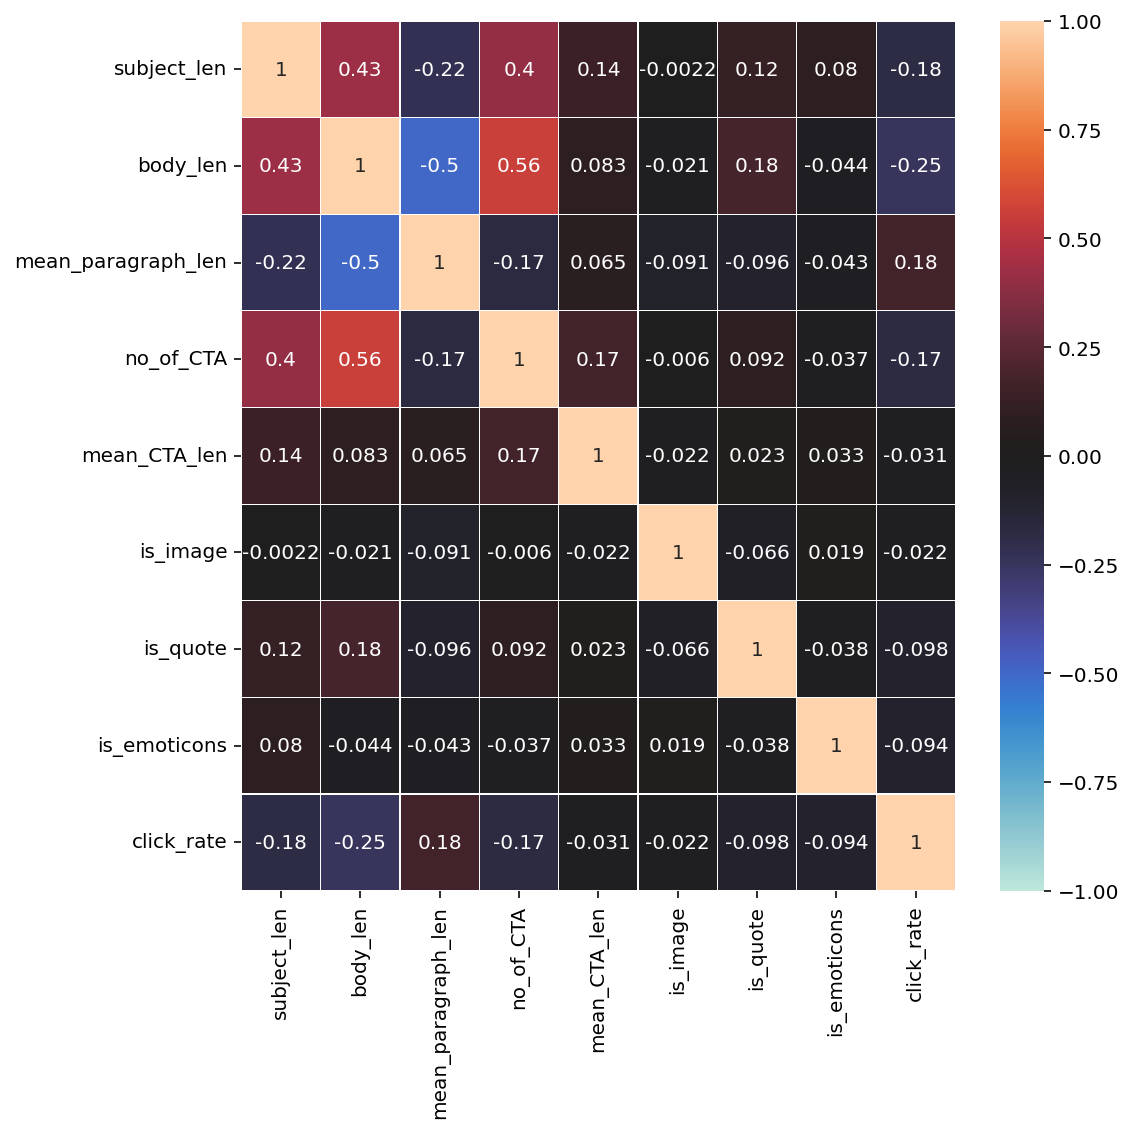

In [85]:
plt.figure(figsize=(8, 8))
sns.heatmap(pearson_df, vmin=-1, vmax=1, center=0, annot=True, linewidths=0.1)
plt.show()

### Kendall-Tau correlation

In [86]:
kendall_df = train[cat_features + [TARGET]].corr(method='kendall')

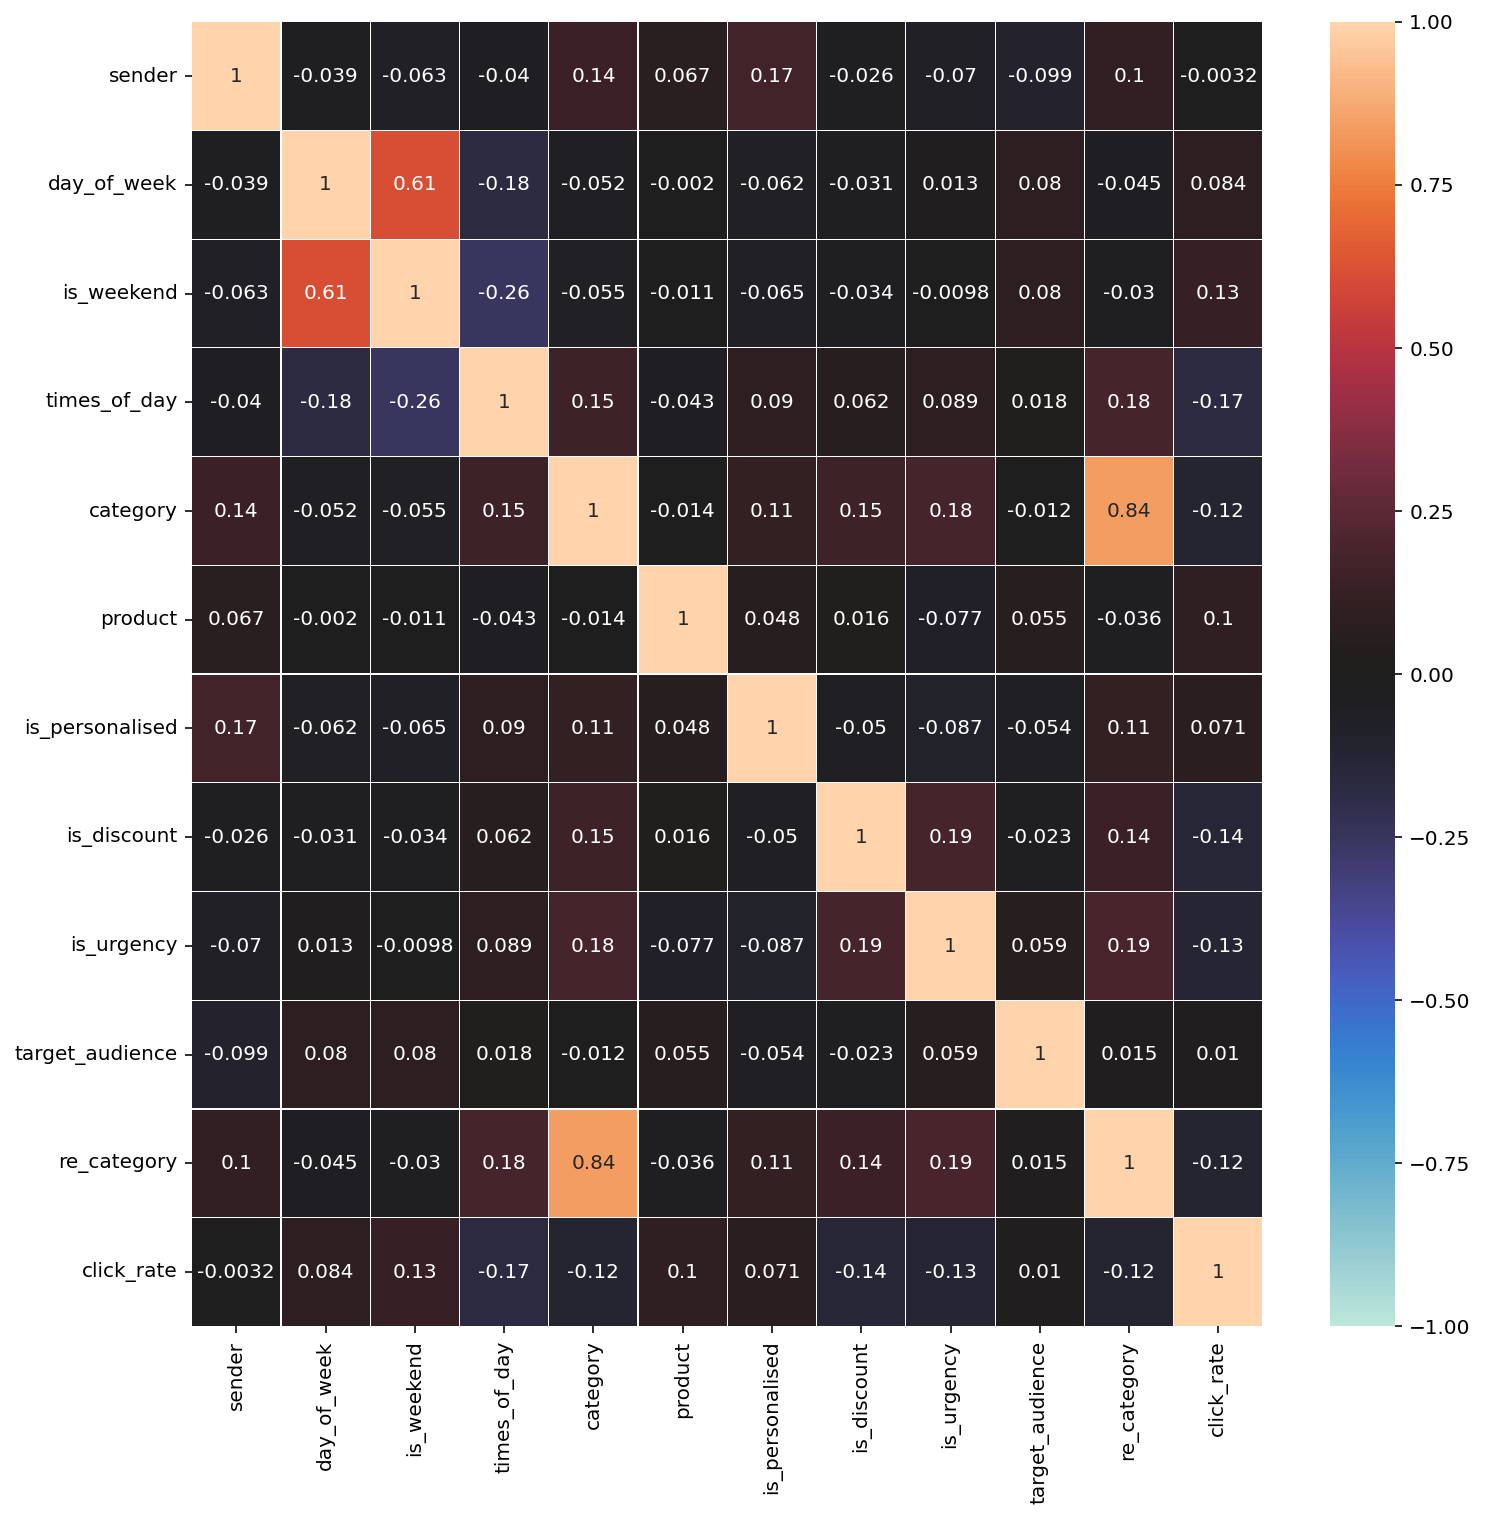

In [87]:
plt.figure(figsize=(12, 12))
sns.heatmap(kendall_df, vmin=-1, vmax=1, center=0, annot=True, linewidths=0.1)
plt.show()

### ANOVA

In [88]:
anova_test = f_classif(train[cat_features], train[TARGET])

pd.DataFrame(
    data={
        'f-statistic': anova_test[0], 
        'p-value': anova_test[1],
        'accepted?': anova_test[1] < 0.05
    },
    index=cat_features
)

,f-statistic,p-value,accepted?
sender,1.558434,6.439335e-03,True
day_of_week,1.100863,2.985774e-01,False
is_weekend,1.142464,2.274294e-01,False
times_of_day,0.984197,5.586683e-01,False
category,1.210655,1.390681e-01,False
product,0.897627,7.645096e-01,False
is_personalised,0.240717,1.000000e+00,False
is_discount,2.063132,4.260413e-05,True
is_urgency,3.746907,1.464014e-11,True
target_audience,2.011528,7.127187e-05,True


### Mutual Information

In [89]:
cat_mask = [(f in cat_features) for f in features] #boolean mask for discrete features

mi_scores = mutual_info_regression(train[features], train[TARGET], 
                                   discrete_features=cat_mask, 
                                   random_state=SEED)

mi_score_percent = mi_scores / sum(mi_scores) * 100

pd.DataFrame(
    data={'mi_score': mi_scores,
          'mi_score_percent': mi_score_percent}, 
    index=features
)

,mi_score,mi_score_percent
sender,0.015978,1.852825
subject_len,0.078770,9.134313
body_len,0.048306,5.601693
mean_paragraph_len,0.020836,2.416169
day_of_week,0.035600,4.128241
is_weekend,0.014584,1.691145
times_of_day,0.019198,2.226227
category,0.103504,12.002484
product,0.169507,19.656345
no_of_CTA,0.024741,2.869026


### Variance Inflation Factor

In [90]:
%%capture
!pip install --upgrade statsmodels==0.13.2
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
def remove_vif_features(X: pd.DataFrame, threshold: float = 5.0) -> list:
    """Remove feature with highest Variance Inflation Factor
    at every iteration until all remaining features are below
    a certain threshold.
    """
    i = 0
    while True:
        vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
        max_vif = np.max(vif)

        if max_vif <= threshold:
            break

        i += 1
        col_to_remove = X.columns[np.argmax(vif)]
        print(f"Iteration {i}: {col_to_remove:20} ({max_vif:.4f})")
        X.drop(col_to_remove, axis=1, inplace=True)

    if i == 0:
        print(f"No columns removed")
    else:
        print(pd.DataFrame({"Feature": X.columns, "VIF": vif}))

    return list(X.columns)

**checking redundant features at different thresholds** (most redundant feature removed at each iteration)

In [92]:
_ = remove_vif_features(train[num_features].copy(), 10) #lenient threshold

No columns removed


In [93]:
_ = remove_vif_features(train[num_features].copy(), 5) #rule-of-thumb threshold

Iteration 1: subject_len          (9.6385)
Iteration 2: mean_CTA_len         (5.8835)
              Feature       VIF
0            body_len  4.186554
1  mean_paragraph_len  1.601292
2           no_of_CTA  2.656945
3            is_image  1.831497
4            is_quote  1.678354
5        is_emoticons  1.097147


In [94]:
_ = remove_vif_features(train[num_features].copy(), 2.5) #strictest threshold

Iteration 1: subject_len          (9.6385)
Iteration 2: mean_CTA_len         (5.8835)
Iteration 3: body_len             (4.1866)
              Feature       VIF
0  mean_paragraph_len  1.572809
1           no_of_CTA  1.534796
2            is_image  1.608428
3            is_quote  1.448413
4        is_emoticons  1.085585


# Baseline

In [95]:
def fit_baseline(X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=SEED)
    
    baseline = RandomForestRegressor(n_estimators=100, random_state=SEED)
    baseline.fit(X_train, y_train)
    
    preds = baseline.predict(X_val)
    print(f'r2-score: {r2_score(y_val, preds)}')
    print(f'RMSE: {mean_squared_error(y_val, preds, squared=False)}')

In [96]:
fit_baseline(train[features], train[TARGET])

r2-score: 0.670561495280515
RMSE: 0.051688591003479424


# Processed dataset

In [99]:
train[features].head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,re_category
0,0,76,10439,39,5,1,1,6,26,3,29,0,0,0,0,0,0,14,6
1,0,54,2570,256,5,1,0,2,11,0,22,0,0,0,0,0,0,10,2
2,0,59,12801,16,5,1,1,2,11,3,23,1,0,1,0,0,0,16,2
3,0,74,11037,30,4,0,2,15,9,4,24,0,0,0,0,0,0,10,15
4,0,80,10011,27,5,1,1,6,26,3,31,0,0,1,0,0,0,14,6


In [100]:
test[features].head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,re_category
0,0,61,12871,11,6,1,1,6,26,3,37,1,0,0,1,0,0,14,6
1,0,54,2569,256,5,1,0,2,11,0,22,0,0,0,0,0,0,10,2
2,0,88,1473,78,4,0,2,2,11,0,22,1,0,1,0,0,0,10,2
3,0,88,1473,78,3,0,2,2,11,0,22,1,0,1,0,0,0,10,2
4,0,78,9020,29,3,0,1,6,26,2,40,0,0,0,0,0,0,14,6


In [101]:
train.to_csv('train_proc.csv', index=False)
test.to_csv('test_proc.csv', index=False)